<a href="https://colab.research.google.com/github/oscardominguez-ds/Explaining-Datasets/blob/main/Project_2_Part_2(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Oscar Dominguez - 03/23/2023
##Assignment - Project 2 Parts 2: Using the approved dataset you proposed for project 2 part 1 last week, you will clean and explore the data set.
#To meet the requirements for this week you must have:
##-Deleted unnecessary columns.
##-Deleted duplicate rows.
##-Identified and addressed missing values.
##-Identified and corrected inconsistencies in data for categorical values (i.e. Cat, cat, cats).
##-Produced univariate visuals for the target and all features.
##-Identified outliers.
##-Clearly commented all of your cleaning steps and described any decisions you made.
##1. Source of data
https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

In [1]:
from sklearn.compose import make_column_selector

In [2]:
## Load the data
import pandas as pd
df = pd.read_csv('/content/heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
#Checking for impossible values. MaxHR has max of 202 which is very high but will leave value
#because it could be an outlier stake holders may need to look into.
# RestingBP, Cholesterol, FastingBS all have mins of zero which we will replace with mean of the column.
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [5]:
#Locating row
df.loc[df['RestingBP'] == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,0,0,0,Normal,155,N,1.5,Flat,1


In [7]:
#Filling RestingBP row that has a value 0 with mean of the column and displaying correction
restingbp_col = df['RestingBP']
restingbp_col.replace(to_replace = 0, value = restingbp_col.mean(), inplace=True)

df.iloc[[449]]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,132.396514,0,0,Normal,155,N,1.5,Flat,1


In [8]:
#Filling Cholesterol rows with 0 value with the mean of the column
cholesterol_col = df['Cholesterol']
cholesterol_col.replace(to_replace = 0, value = cholesterol_col.mean(), inplace=True)

In [9]:
#Filling FastingBS rows with 0 value with the mean of the column 
fastingbs_col = df['FastingBS']
fastingbs_col.replace(to_replace = 0, value = fastingbs_col.mean(), inplace=True)

In [10]:
#Checking to ensure mins of 0 for have been filled with the mean of the column
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.540737,236.047413,0.411888,136.809368,0.887364,0.553377
std,9.432617,17.989932,56.240952,0.324427,25.460334,1.066570,0.497414
min,28.000000,80.000000,85.000000,0.233115,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,198.799564,0.233115,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.233115,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.233115,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


##Deleted duplicate rows

In [11]:
#Pringing duplicates
print(f'There are {df.duplicated().sum()} duplicate rows.')

There are 0 duplicate rows.


##Deleted unnecessary columns.

In [12]:
#There are no columns that are identifiers such as IDs, dates, or counters. Hence, no columns will be deleted.

##Identify and address missing values.

In [13]:
 #Checking missing values. There are no missing values.
 df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

##Identify and correct inconsistencies in data for categorical 

In [14]:
#Printing columns to double check they look ok.
cat_cols = make_column_selector(dtype_include='object')(df)

for col in cat_cols:
  display(df[col].value_counts(normalize=True))

M    0.78976
F    0.21024
Name: Sex, dtype: float64

ASY    0.540305
NAP    0.221133
ATA    0.188453
TA     0.050109
Name: ChestPainType, dtype: float64

Normal    0.601307
LVH       0.204793
ST        0.193900
Name: RestingECG, dtype: float64

N    0.595861
Y    0.404139
Name: ExerciseAngina, dtype: float64

Flat    0.501089
Up      0.430283
Down    0.068627
Name: ST_Slope, dtype: float64

##-Produced univariate visuals for the target and all features.
##-Identified outliers.


Text(0.5, 1.0, 'Heart Disease')

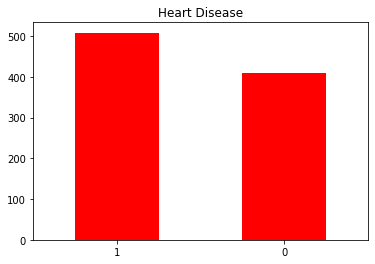

In [15]:
#importig library for bar plot
import matplotlib.pyplot as plt

# Using matplotlib directly
df['HeartDisease'].value_counts().plot.bar(rot=0, color='Red')
plt.title('Heart Disease')


Text(0.5, 1.0, 'Chest Pain Type')

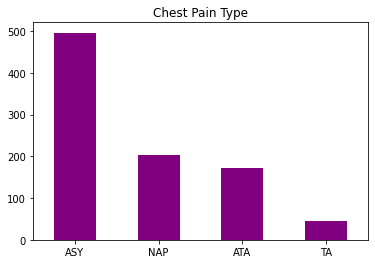

In [16]:
# Using matplotlib directly
df['ChestPainType'].value_counts().plot.bar(rot=0, color='Purple')
plt.title('Chest Pain Type')


Text(0.5, 1.0, 'Sex')

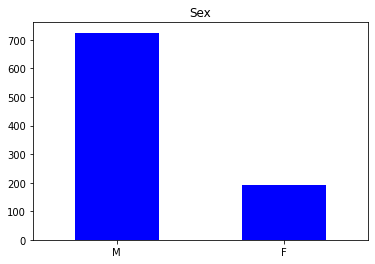

In [17]:
# Using matplotlib directly
df['Sex'].value_counts().plot.bar(rot=0, color='Blue')
plt.title('Sex')

Text(0.5, 1.0, 'Resting ECG')

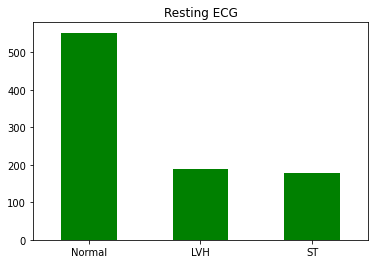

In [18]:
# Using matplotlib directly
df['RestingECG'].value_counts().plot.bar(rot=0, color='Green')
plt.title('Resting ECG')

Text(0.5, 1.0, 'Exercise Angina')

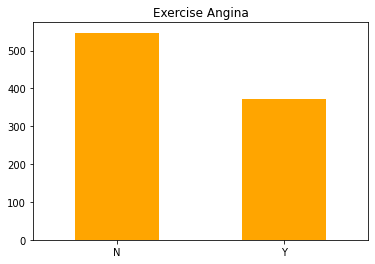

In [19]:
# Using matplotlib directly
df['ExerciseAngina'].value_counts().plot.bar(rot=0, color='Orange')
plt.title('Exercise Angina')

Text(0.5, 1.0, 'ST Slope')

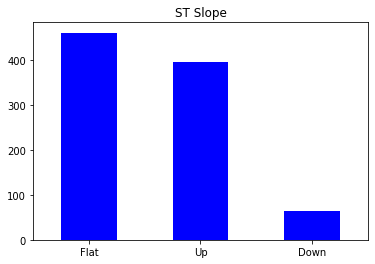

In [20]:
# Using matplotlib directly
df['ST_Slope'].value_counts().plot.bar(rot=0, color='Blue')
plt.title('ST Slope')

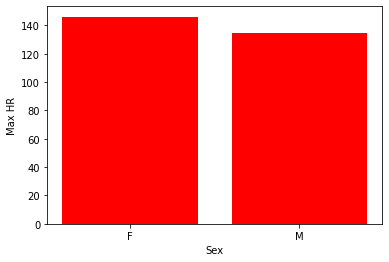

In [21]:
# Using matplotlib directly
maxhr_mean = df.groupby('Sex')['MaxHR'].mean()

fig, ax = plt.subplots()
ax.bar(maxhr_mean.index, maxhr_mean.values,color='Red' )
ax.set_ylabel('Max HR')
ax.set_xlabel('Sex');

###Outliers -  there are some younger patients with heart disease

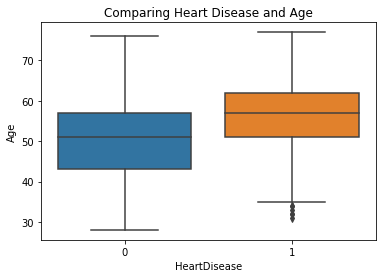

In [22]:
#Importing library for Seaborn boxplot
import seaborn as sns

# Boxplot with seaborn
ax = sns.boxplot(x='HeartDisease', y='Age', data=df)
ax.set_title("Comparing Heart Disease and Age");


###Outliers - There are patients with and withou heart disease have higher than the mean blood presure

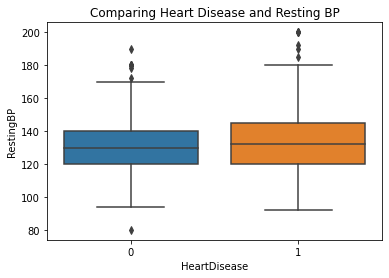

In [23]:
#Boxplot with seaborn
ax = sns.boxplot(x='HeartDisease', y='RestingBP', data=df)
ax.set_title("Comparing Heart Disease and Resting BP");

###Outliers - both patients with and without heard disease have higher than normal Cholesterol

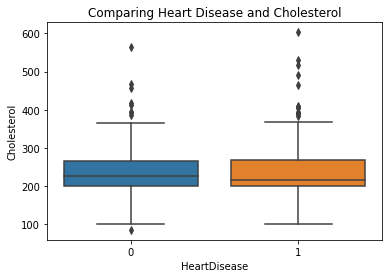

In [24]:
# Boxplot with seaborn
ax = sns.boxplot(x='HeartDisease', y='Cholesterol', data=df)
ax.set_title("Comparing Heart Disease and Cholesterol");

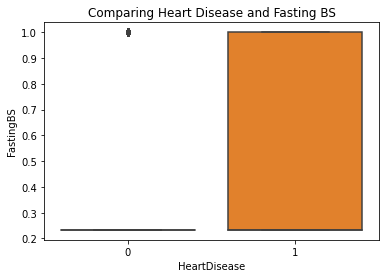

In [25]:
# Boxplot with seaborn
ax = sns.boxplot(x='HeartDisease', y='FastingBS', data=df)
ax.set_title("Comparing Heart Disease and Fasting BS");

###Outliers -  some patients have a low heart rate compared to others. Some of the low heart rate patients have malignant 

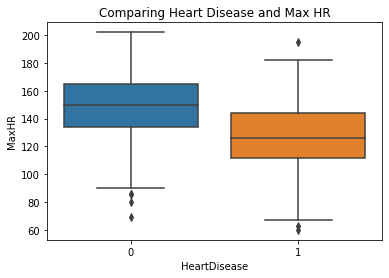

In [26]:
# Boxplot with seaborn
ax = sns.boxplot(x='HeartDisease', y='MaxHR', data=df)
ax.set_title("Comparing Heart Disease and Max HR");

###Outliers - Oldpeak has some outliers in both target categories. 

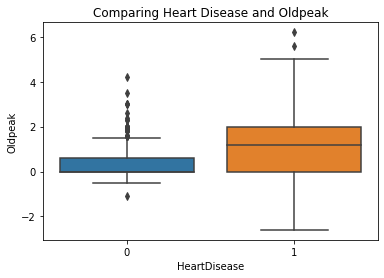

In [27]:
# Boxplot with seaborn
ax = sns.boxplot(x='HeartDisease', y='Oldpeak', data=df)
ax.set_title("Comparing Heart Disease and Oldpeak");